# 勾配ブースティング回帰（特徴量：RM、max_depth=1）の予測値の可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==2.0.3
# !pip install numpy==1.25.2
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.3
# !pip install scikit-learn==1.2.2

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__)

2.0.3
1.25.2
3.7.1
0.20.3
1.2.2


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [ ]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['RM']] # 特徴量に100件のRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値に100件のMEDV（住宅価格）を設定
display(X_train)
display(y_train)

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
95,6.625
96,6.163
97,8.069
98,7.820


0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
      ... 
95    28.4
96    21.4
97    38.7
98    43.8
99    33.2
Name: MEDV, Length: 100, dtype: float64

In [ ]:
# モデルの学習
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=2, learning_rate=0.8, criterion='squared_error', loss ='squared_error', max_depth=1, min_samples_leaf=1, ccp_alpha=0, random_state=0)
model.fit(X_train, y_train)
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.8,
 'loss': 'squared_error',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 2,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 予測値
model.predict(X_train)

array([23.11799636, 23.11799636, 33.68557212, 33.68557212, 33.68557212,
       23.11799636, 19.1235628 , 23.11799636, 19.1235628 , 19.1235628 ,
       23.11799636, 19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 ,
       19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 ,
       19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 ,
       19.1235628 , 19.1235628 , 19.1235628 , 23.11799636, 23.11799636,
       19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 ,
       19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 , 23.11799636,
       33.68557212, 23.11799636, 23.11799636, 23.11799636, 19.1235628 ,
       19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 , 19.1235628 ,
       19.1235628 , 19.1235628 , 23.11799636, 19.1235628 , 19.1235628 ,
       33.68557212, 23.11799636, 33.68557212, 23.11799636, 19.1235628 ,
       19.1235628 , 19.1235628 , 23.11799636, 23.11799636, 33.68557212,
       23.11799636, 19.1235628 , 19.1235628 , 19.1235628 , 19.12

In [ ]:
# 初期値の計算
pred0 = np.mean(y_train)
print(pred0)

22.309


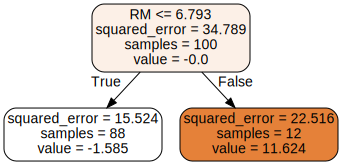

In [ ]:
# 木の可視化
from sklearn import tree

# ブースティング1回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[0, 0], out_file=None, rounded=True, feature_names=['RM'], filled=True)
graphviz.Source(dot_data, format='png')

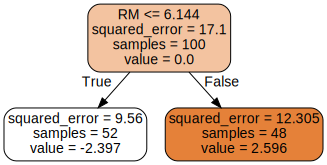

In [ ]:
# ブースティング2回目の木の可視化
dot_data = tree.export_graphviz(model.estimators_[1, 0], out_file=None, rounded=True, feature_names=['RM'], filled=True)
graphviz.Source(dot_data, format='png')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


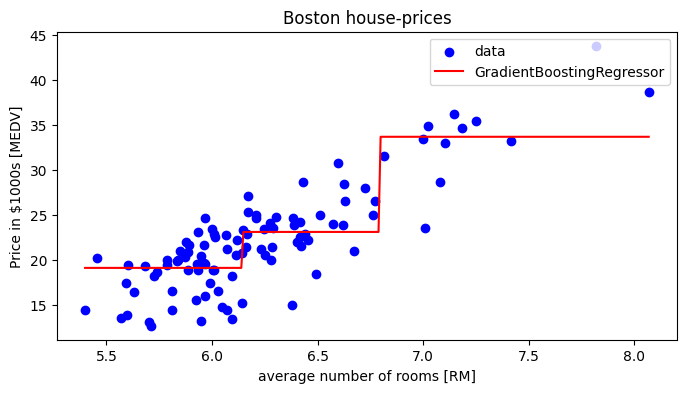

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red' ,label='GradientBoostingRegressor')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()